In [1]:
%matplotlib inline



# Topological sorting

This example demonstrates how to get a topological sorting on a directed acyclic graph (DAG). A topological sorting of a directed graph is a linear ordering based on the precedence implied by the directed edges. It exists iff the graph doesn't have any cycle. In ``igraph``, we can use :meth:`igraph.GraphBase.topological_sorting` to get a topological ordering of the vertices.


In [2]:
import igraph as ig
import matplotlib.pyplot as plt

First off, we generate a directed acyclic graph (DAG):



In [3]:
g = ig.Graph(
    edges=[(0, 1), (0, 2), (1, 3), (2, 4), (4, 3), (3, 5), (4, 5)],
    directed=True,
)

We can verify immediately that this is actually a DAG:



In [4]:
assert g.is_dag

A topological sorting can be computed quite easily by calling
:meth:`igraph.GraphBase.topological_sorting`, which returns a list of vertex IDs.
If the given graph is not DAG, the error will occur.



In [5]:
results = g.topological_sorting(mode='out')
print('Topological sort of g (out):', *results)

Topological sort of g (out): 0 1 2 4 3 5


In fact, there are two modes of :meth:`igraph.GraphBase.topological_sorting`,
``'out'`` ``'in'``. ``'out'`` is the default and starts from a node with
indegree equal to 0. Vice versa, ``'in'`` starts from a node with outdegree
equal to 0. To call the other mode, we can simply use:



In [6]:
results = g.topological_sorting(mode='in')
print('Topological sort of g (in):', *results)

Topological sort of g (in): 5 3 1 4 2 0


We can use :meth:`igraph.Vertex.indegree` to find the indegree of the node.



degree of 0: 0
degree of 1: 1
degree of 2: 1
degree of 3: 2
degree of 4: 1
degree of 5: 2


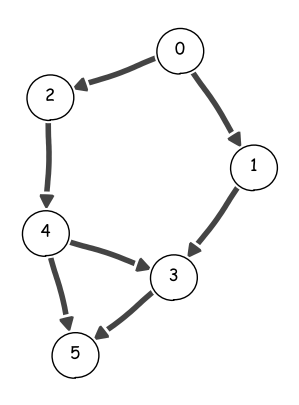

In [7]:
for i in range(g.vcount()):
    print('degree of {}: {}'.format(i, g.vs[i].indegree()))

# %
# Finally, we can plot the graph to make the situation a little clearer.
# Just to change things up a bit, we use the matplotlib visualization mode
# inspired by `xkcd <https://xkcd.com/>_:
with plt.xkcd():
    fig, ax = plt.subplots(figsize=(5, 5))
    ig.plot(
            g,
            target=ax,
            layout='kk',
            vertex_size=0.3,
            edge_width=4,
            vertex_label=range(g.vcount()),
            vertex_color="white",
        )